In [8]:
import pandas as pd

In [6]:
df_sentiments = pd.read_csv('data/News Articles/Amy/Article_sentiments.csv')
df_sentiments.head()

,Unnamed: 0,Datetime,Vader Title Score,Vader Description Score,Flair Title Label,Flair Title Score,Flair Description Label,Flair Description Score,DistilBERT Title Label,DistilBERT Title Score,...,GBDT Description Label,GBDT Description Score,RF Title Label,RF Title Score,RF Description Label,RF Description Score,KNN Title Label,KNN Title Score,KNN Description Label,KNN Description Score
0,0,2025-04-09 13:25:00,0.0000,-0.5423,NEG,0.983125,NEG,0.770095,NEG,0.930588,...,POS,0.511745,NEG,0.78,NEG,0.69,NEG,0.8,NEG,0.6
1,1,2025-04-09 15:36:00,0.0000,0.2023,POS,0.986298,NEG,0.651992,POS,0.999773,...,NEG,0.721660,NEG,0.59,NEG,0.82,NEG,0.6,NEG,0.6
2,2,2025-04-10 01:25:00,-0.3182,-0.7003,NEG,0.992655,NEG,0.996673,NEG,0.783628,...,NEG,0.604404,NEG,0.78,NEG,0.75,NEG,0.4,NEG,0.4
3,3,2025-04-10 01:30:00,-0.7003,-0.8756,NEG,0.963888,NEG,0.997265,NEG,0.990447,...,NEG,0.811352,NEG,0.96,NEG,0.87,NEG,1.0,NEG,1.0
4,4,2025-04-10 01:21:00,0.0000,0.9325,NEG,0.584966,POS,0.620428,NEG,0.937421,...,NEG,0.696641,NEG,0.72,NEG,0.73,POS,0.8,NEG,0.8


In [13]:
df_price = pd.read_excel('data/Stock Data/SnP futures intraday.xlsx', index_col=0)
df_price.index = pd.to_datetime(df_price.index)
df_price.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
Time at end of bar,,,,,
2024-12-11 18:00:00,6087.50,6087.75,6086.50,6086.75,513
2024-12-11 18:01:00,6086.75,6087.00,6085.25,6085.50,366
2024-12-11 18:02:00,6085.50,6087.25,6085.50,6087.00,239
2024-12-11 18:03:00,6087.00,6087.50,6087.00,6087.25,80
2024-12-11 18:04:00,6087.00,6087.50,6087.00,6087.25,124


In [17]:
# BT strat funciton

import backtrader as bt

class DebugStrategy(bt.Strategy):
    params = ()

    def __init__(self):
        pass

    def next(self):
        pass

def run(Strategy = DebugStrategy, initial_cash = 10000, commission = 0.001, file_path = 'plot.png'):
    cerebro = bt.Cerebro()

    data = bt.feeds.PandasData(dataname=df_price, plot=True)
    cerebro.adddata(data, name='price')

    data1 = bt.feeds.PandasData(dataname=df_sentiments, plot=False)
    cerebro.adddata(data1, name='sentiment')

    cerebro.addstrategy(Strategy)

    cerebro.broker.setcash(initial_cash)
    cerebro.broker.setcommission(commission=commission)

    # cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')
    # cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    # cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trades')

    results = cerebro.run()
    strategy = results[0]

    # print(f'Initial Portfolio Value: {initial_cash}, commission: {commission}')
    # print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # print('Sharpe Ratio:', strategy.analyzers.sharpe.get_analysis()['sharperatio'])
    # print('Total Return:', strategy.analyzers.returns.get_analysis()['rtot'])
    # print('Total Trades:', strategy.analyzers.trades.get_analysis()['total']['total'])
    #
    # # Plot result
    # fig = cerebro.plot(style="candlestick")[0][0]
    # path = 'data/Results Charts Models/Backtesting Versions/V3/' + file_path
    # fig.savefig(path)

In [19]:
class Strategy1(bt.Strategy):
    params = ()

    def __init__(self):
        pass

    def next(self):
        pass

run(Strategy1)

AttributeError: 'int' object has no attribute 'to_pydatetime'

Initial Portfolio Value: 10000, commission: 0.001
Final Portfolio Value: 10000.00
Sharpe Ratio: None
Total Return: 0.0
Total Trades: 0


<IPython.core.display.Javascript object>

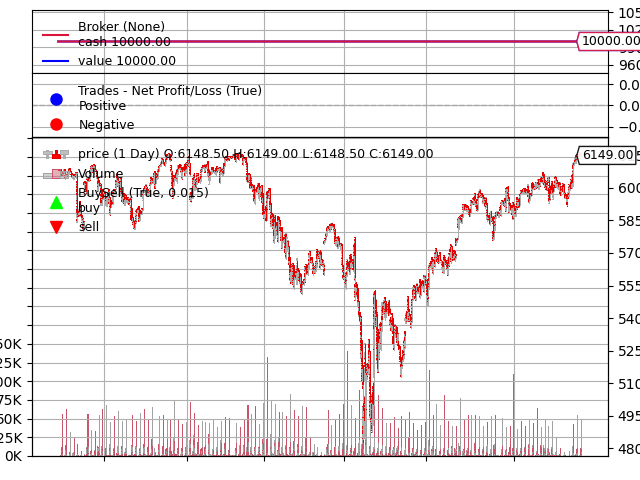

In [16]:
from IPython.display import Image
Image('data/Results Charts Models/Backtesting Versions/V3/plot.png')